In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
# routeid_list = ["CAB285000006",
#                 "CAB285000007",
#                 "CAB285000008",
#                 "CAB285000009",
#                 "CAB285000010",
#                 "CAB285000011",
#                 "CAB285000012",
#                 "CAB285000013",
#                 "CAB285000024",
#                 "CAB285000025",
#                 "CAB285000293",
#                 "CAB285000294"]
# dir_list = ["../Stage_1_1", "../Stage_2_1"]

In [20]:
# for r_id in routeid_list:
#     bus_dic = {}
#     bus_df = pd.DataFrame(columns=['Stage', 'Time gap', 'Average'])
    
#     for idx, directory in enumerate(dir_list):
#         path =  directory 
#         file_list = os.listdir(path)

#         bus_dic[directory] = []
        
#         for file in file_list:

#             df = pd.read_csv(path+"/"+file)
#             curr_bus = df[df["routeid"] == r_id]
            
#             for i in range(0, len(curr_bus), 2):
#                 gap = curr_bus.iloc[i+1, 6] - curr_bus.iloc[i, 6]
#                 bus_dic[directory].append(abs(gap))

#         bus_df.at[idx, "Stage"] = idx + 1
#         bus_df.at[idx, "Time gap"] = bus_dic[directory]
#         bus_df.at[idx, "Average"] = np.mean(bus_dic[directory])
    
#     file_name = "../mine_1/"+r_id +"_1.csv"
#     bus_df.to_csv(file_name, index=False, mode='w', encoding='utf-8-sig')
    

In [46]:
# total_averages = pd.DataFrame(columns=["CAB285000006",
#                                        "CAB285000007",
#                                        "CAB285000008",
#                                        "CAB285000009",
#                                        "CAB285000010",
#                                        "CAB285000011",
#                                        "CAB285000012",
#                                        "CAB285000013",
#                                        "CAB285000024",
#                                        "CAB285000025",
#                                        "CAB285000293",
#                                        "CAB285000294"],
#                               index=["Stage1_1",
#                                      "Stage2_1"])

# path =  "../mine_1"
# file_list = os.listdir(path)
# file_list


# for i in range(0,len(file_list)):
#     temp = pd.read_csv("../mine_1/"+file_list[i])
#     #print(temp)
#     r_id = file_list[i][:-6]
#     #print(r_id)
#     total_averages[r_id][0] = (temp["Average"][0])
#     total_averages[r_id][1] = (temp["Average"][1])

# total_averages["total_average"] = total_averages.mean(axis=1)
# total_averages.to_csv("../csv/data_table_1.csv", index=False, mode='w', encoding='utf-8-sig')

In [2]:
df = pd.read_csv("../csv/data_table.csv")


In [3]:
df = df.drop("total_average", axis =1)

In [4]:
# 데이터 칼럼,인덱스 이름 변경
df.index = ["Stage1", "Stage2", "Stage3", "Stage4", "Stage1_1", "Stage2_1"]
df.columns = ["11(6)","11(7)","12(8)","12(9)","13(10)","13(11)","14(12)","14(13)","24(24)","24(25)","81(293)","81(294)"]
df.columns.names = ["bus_num(routeid)"]


In [5]:
df

bus_num(routeid),11(6),11(7),12(8),12(9),13(10),13(11),14(12),14(13),24(24),24(25),81(293),81(294)
Stage1,796.918719,764.947880,521.320485,514.547072,538.939394,625.515038,837.389861,655.078697,991.523913,881.778357,804.034519,873.218513
Stage2,793.815318,769.053086,511.359846,542.199461,590.789880,735.798422,847.333515,674.347344,1150.791498,1082.750939,753.559748,915.514825
Stage3,770.970349,735.966148,551.102027,537.877256,699.436142,787.330587,926.645785,694.722884,1213.073171,1213.046575,909.930876,1041.282119
Stage4,796.588687,802.998421,587.739851,705.513652,684.777651,927.331453,924.511318,716.266862,1251.663690,1248.347664,904.608905,986.392473
Stage1_1,794.906516,756.983498,463.436667,507.458182,531.080000,690.502439,789.420168,723.413462,1150.049724,1036.659574,650.848039,1103.593985
Stage2_1,805.604651,747.081218,572.218579,553.051136,720.510949,741.689922,899.553398,633.639594,1266.481132,994.083333,777.266187,895.900000


In [24]:
route_info = pd.read_csv('../csv/route_info.csv')
interval_times = route_info['intervaltime']

In [25]:
time_gap_df = pd.DataFrame(columns=["Specified Time", "Actual Time(1)", "Actual Time(2)","Actual Time(3)","Actual Time(4)","Actual Time(1_1)","Actual Time(2_1)"])

In [26]:
for i, c in enumerate(df.columns):
    time_gap_df.loc[i] = [interval_times[i], df[c][0]/60, df[c][1]/60, df[c][2]/60, df[c][3]/60, df[c][4]/60, df[c][5]/60 ]

time_gap_df.index = ["11(6)","11(7)","12(8)","12(9)","13(10)","13(11)","14(12)","14(13)","24(24)","24(25)","81(293)","81(294)"]
time_gap_df   

,Specified Time,Actual Time(1),Actual Time(2),Actual Time(3),Actual Time(4),Actual Time(1_1),Actual Time(2_1)
11(6),10.0,13.281979,13.230255,12.849506,13.276478,13.248442,13.426744
11(7),10.0,12.749131,12.817551,12.266102,13.383307,12.616392,12.451354
12(8),7.0,8.688675,8.522664,9.185034,9.795664,7.723944,9.536976
12(9),7.0,8.575785,9.036658,8.964621,11.758561,8.457636,9.217519
13(10),11.0,8.982323,9.846498,11.657269,11.412961,8.851333,12.008516
13(11),11.0,10.425251,12.263307,13.122176,15.455524,11.508374,12.361499
14(12),10.0,13.956498,14.122225,15.444096,15.408522,13.157003,14.992557
14(13),10.0,10.917978,11.239122,11.578715,11.937781,12.056891,10.560660
24(24),20.0,16.525399,19.179858,20.217886,20.861062,19.167495,21.108019
24(25),20.0,14.696306,18.045849,20.217443,20.805794,17.277660,16.568056


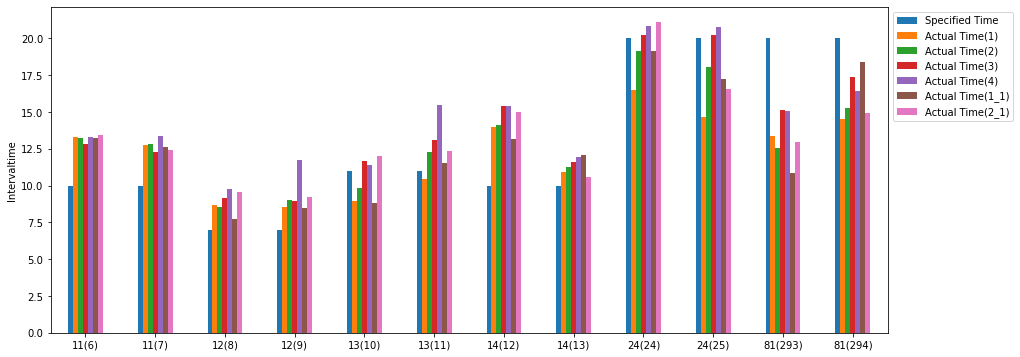

In [20]:
ax = time_gap_df.plot(kind="bar", width=0.5, figsize=(15,6), rot=0)
#plt.title("Compare Actual time", fontsize=20)
plt.ylabel("Intervaltime")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
plt.savefig('../image/Compare_Specified_time_with_Actual_Time.png',dpi=300,bbox_inches='tight')

In [137]:
df["11(6)"]["Stage1"]
df.index

796.9187192118228

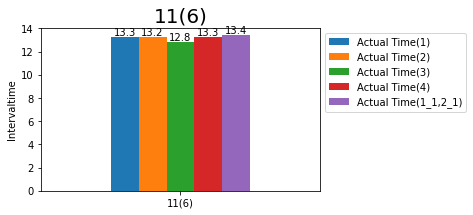

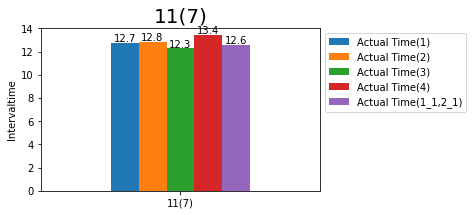

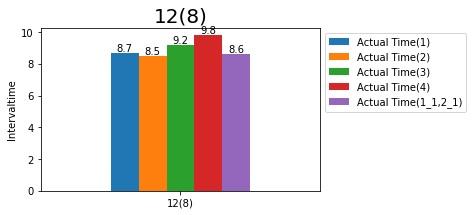

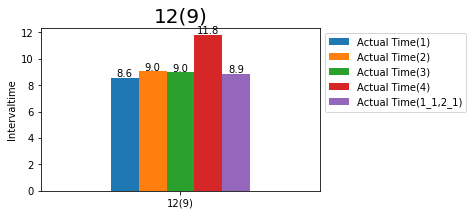

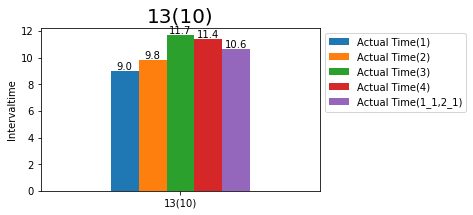

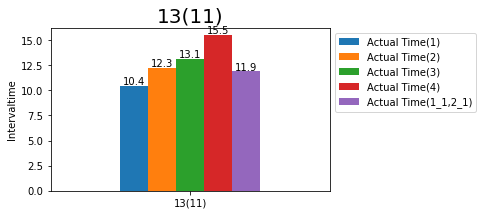

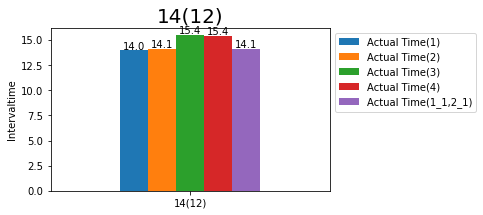

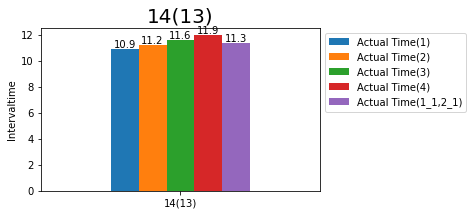

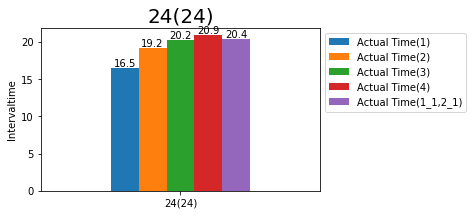

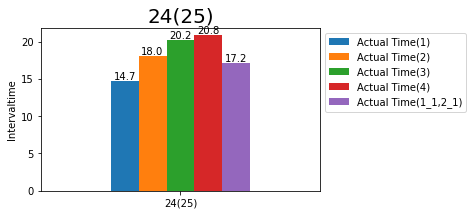

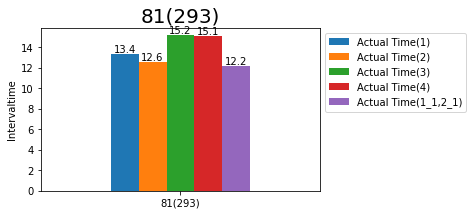

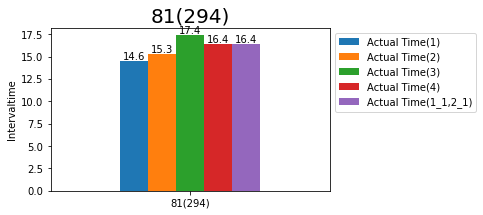

In [181]:
for c in df.columns:
    time_gap_df = pd.DataFrame(columns=[ "Actual Time(1)", "Actual Time(2)","Actual Time(3)","Actual Time(4)","Actual Time(1_1,2_1)"])

    time_gap_df.loc[index] = [df[c][0]/60, df[c][1]/60,df[c][2]/60,df[c][3]/60,df2[c].mean()/60]
    time_gap_df.index = [c]
    #print(time_gap_df)   
    ax = time_gap_df.plot(kind="bar", width=0.5, figsize=(5,3), rot=0)
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%.1f"%(height), (left+width/2, height*1.01), ha='center')
    plt.title(c, fontsize=20)
    plt.ylabel("Intervaltime")
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
    #plt.savefig('../image/.bbpng',dpi=130,bbox_inches='tight')

In [158]:
time_gap_df

,Actual Time(1),Actual Time(2),Actual Time(3),Actual Time(4),"Actual Time(1_1,2_1)"
0,13.281979,13.230255,12.849506,13.276478,13.392099
1,12.749131,12.817551,12.266102,13.383307,12.577538
2,8.688675,8.522664,9.185034,9.795664,8.647220
3,8.575785,9.036658,8.964621,11.758561,8.864285
4,8.982323,9.846498,11.657269,11.412961,10.632883
5,10.425251,12.263307,13.122176,15.455524,11.893448
6,13.956498,14.122225,15.444096,15.408522,14.122980
7,10.917978,11.239122,11.578715,11.937781,11.326981
8,16.525399,19.179858,20.217886,20.861062,20.422007
9,14.696306,18.045849,20.217443,20.805794,17.173547


In [199]:
time_gap_df# gap

,stage1_gap,stage2_gap,stage3_gap,stage4_gap
11(6),0.110121,0.161844,0.542593,0.115621
11(7),0.171594,0.240014,0.311435,0.805769
12(8),0.041455,0.124555,0.537814,1.148445
12(9),0.288501,0.172372,0.100336,2.894276
13(10),1.650560,0.786385,1.024386,0.780077
13(11),1.468197,0.369859,1.228729,3.562076
14(12),0.166482,0.000754,1.321117,1.285542
14(13),0.409003,0.087859,0.251734,0.610800
24(24),3.896608,1.242148,0.204120,0.439055
24(25),2.477241,0.872302,3.043896,3.632248


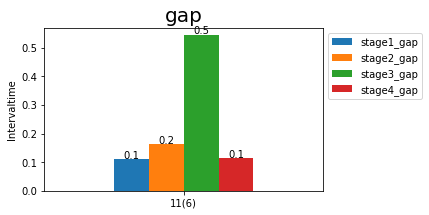

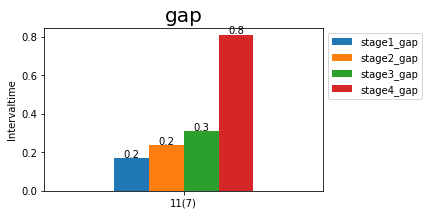

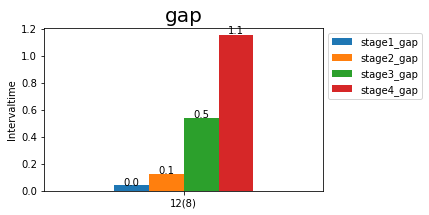

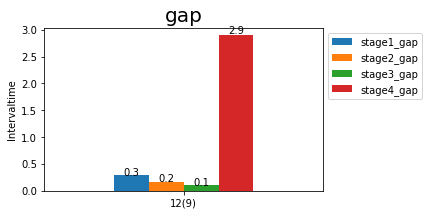

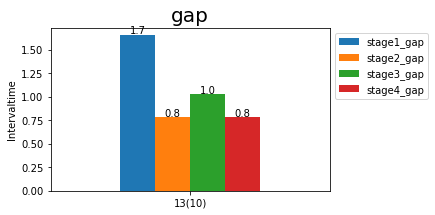

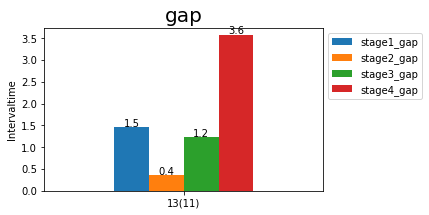

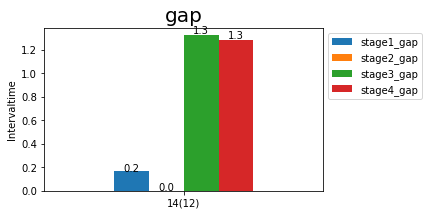

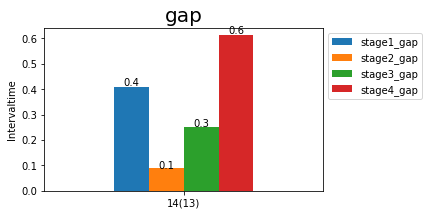

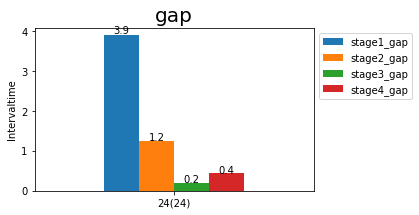

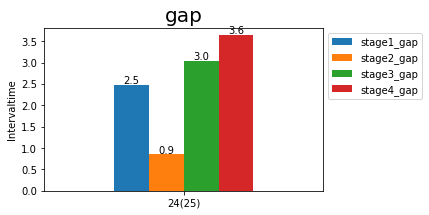

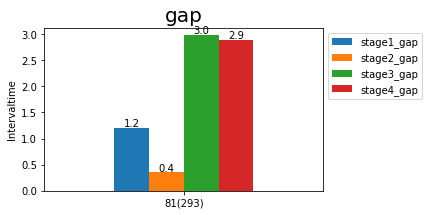

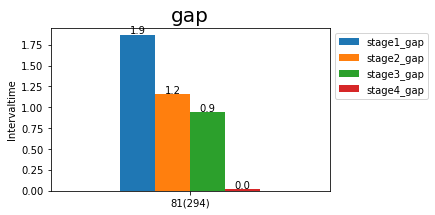

In [201]:
for c in df.columns:
    time_gap_df = pd.DataFrame(columns=[ "stage1_gap","stage2_gap","stage3_gap","stage4_gap"])
    a = df2[c].mean()/60
    time_gap_df.loc[index] = [abs((df[c][0]/60) - a), abs(df[c][1]/60 - a), abs(df[c][2]/60 - a), abs(df[c][3]/60 - a)]
    
    time_gap_df.index = [c]
    ax = time_gap_df.plot(kind="bar", width=0.5, figsize=(5,3), rot=0)
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%.1f"%(height), (left+width/2, height*1.01), ha='center')
    plt.title("gap", fontsize=20)
    plt.ylabel("Intervaltime")
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
    #plt.savefig('../image/.png',dpi=130,bbox_inches='tight')